In [2]:
!pip install qiskit
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.2 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=4f4d2b44539248c416a60d10d26b307a8e425de2bdd7286461d3f8124de99aa5
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [3]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [29]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

# Оракул

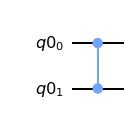

In [4]:
def phase_oracle(circuit, register):
    circuit.cz(register[0], register[1])

qr = QuantumRegister(2)
oracleCircuit = QuantumCircuit(qr)
phase_oracle(oracleCircuit, qr)
oracleCircuit.draw(output="mpl")

# Диффузия Гровера

In [14]:
def inversion_about_average(circuit, register):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.barrier()
    circuit.h(register)
    circuit.z(register)
    circuit.cz(register[0], register[1])
    circuit.h(register)
    circuit.barrier() 

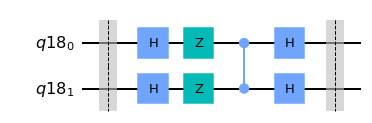

In [15]:
qAverage = QuantumCircuit(qr)
inversion_about_average(qAverage, qr)
qAverage.draw(output='mpl')

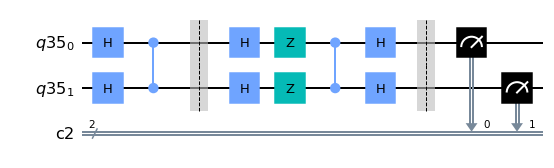

In [16]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

phase_oracle(groverCircuit, qr)
inversion_about_average(groverCircuit, qr)

groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

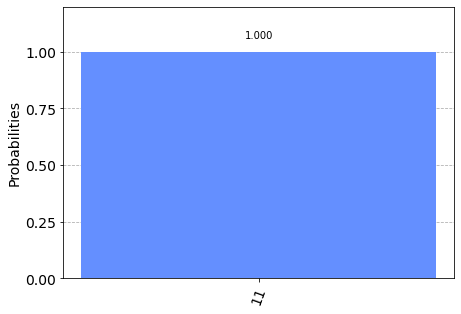

In [17]:
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

# Алгоритм Гровера с использованием анциллы

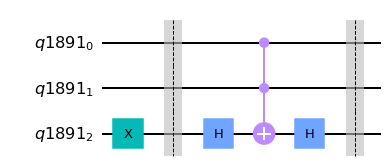

In [52]:
def phase_oracle(circuit, register,oracle_register):
    circuit.barrier()
    circuit.h(oracle_register)
    circuit.ccx(register[0], register[1],oracle_register)
    circuit.h(oracle_register)
    circuit.barrier()
    
qr = QuantumRegister(3)
oracleCircuit = QuantumCircuit(qr)
oracleCircuit.x(qr[2])
phase_oracle(oracleCircuit, qr,qr[2])
oracleCircuit.draw(output="mpl")

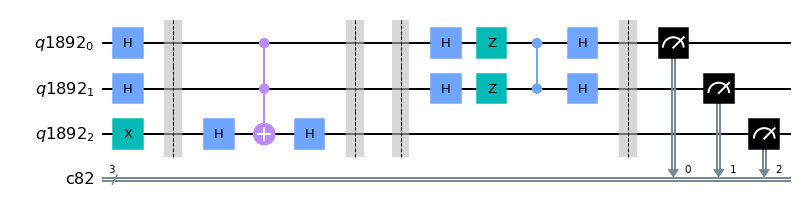

In [53]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr[0:2])
groverCircuit.x(qr[2])

phase_oracle(groverCircuit, qr,qr[2])
inversion_about_average(groverCircuit, qr[0:2])

groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

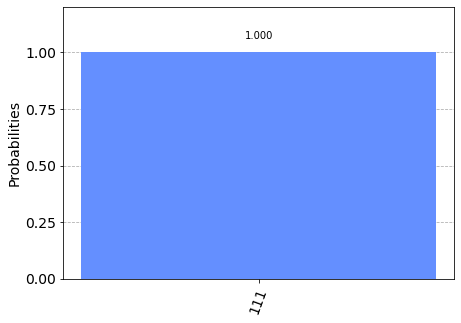

In [54]:
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

# Число Итераций

In [61]:
backend = BasicAer.get_backend('qasm_simulator')
prob_of_ans = []
iter_num = 12
for i in range(iter_num):
    database = QuantumRegister(4)
    oracle = QuantumRegister(1)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(database, oracle, cr)
    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])


    for j in range(i):
        # oracle_4q
        # search 7: 0111 
        qc.x(database[0])
        qc.mcx(database[:], oracle[0]) 
        qc.x(database[0])
        qc.barrier()

        # diffusion_4q
        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[3])
        qc.mcx(database[0:3], database[3])
        qc.h(database[3])
        qc.x(database[:])
        qc.h(database[:])
        qc.barrier()


    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database,cr)
    
    job = execute(qc, backend=backend, shots=shots)
    result = job.result()
    count = result.get_counts()
    answer = count['1110']
    prob_of_ans.append(answer / shots)

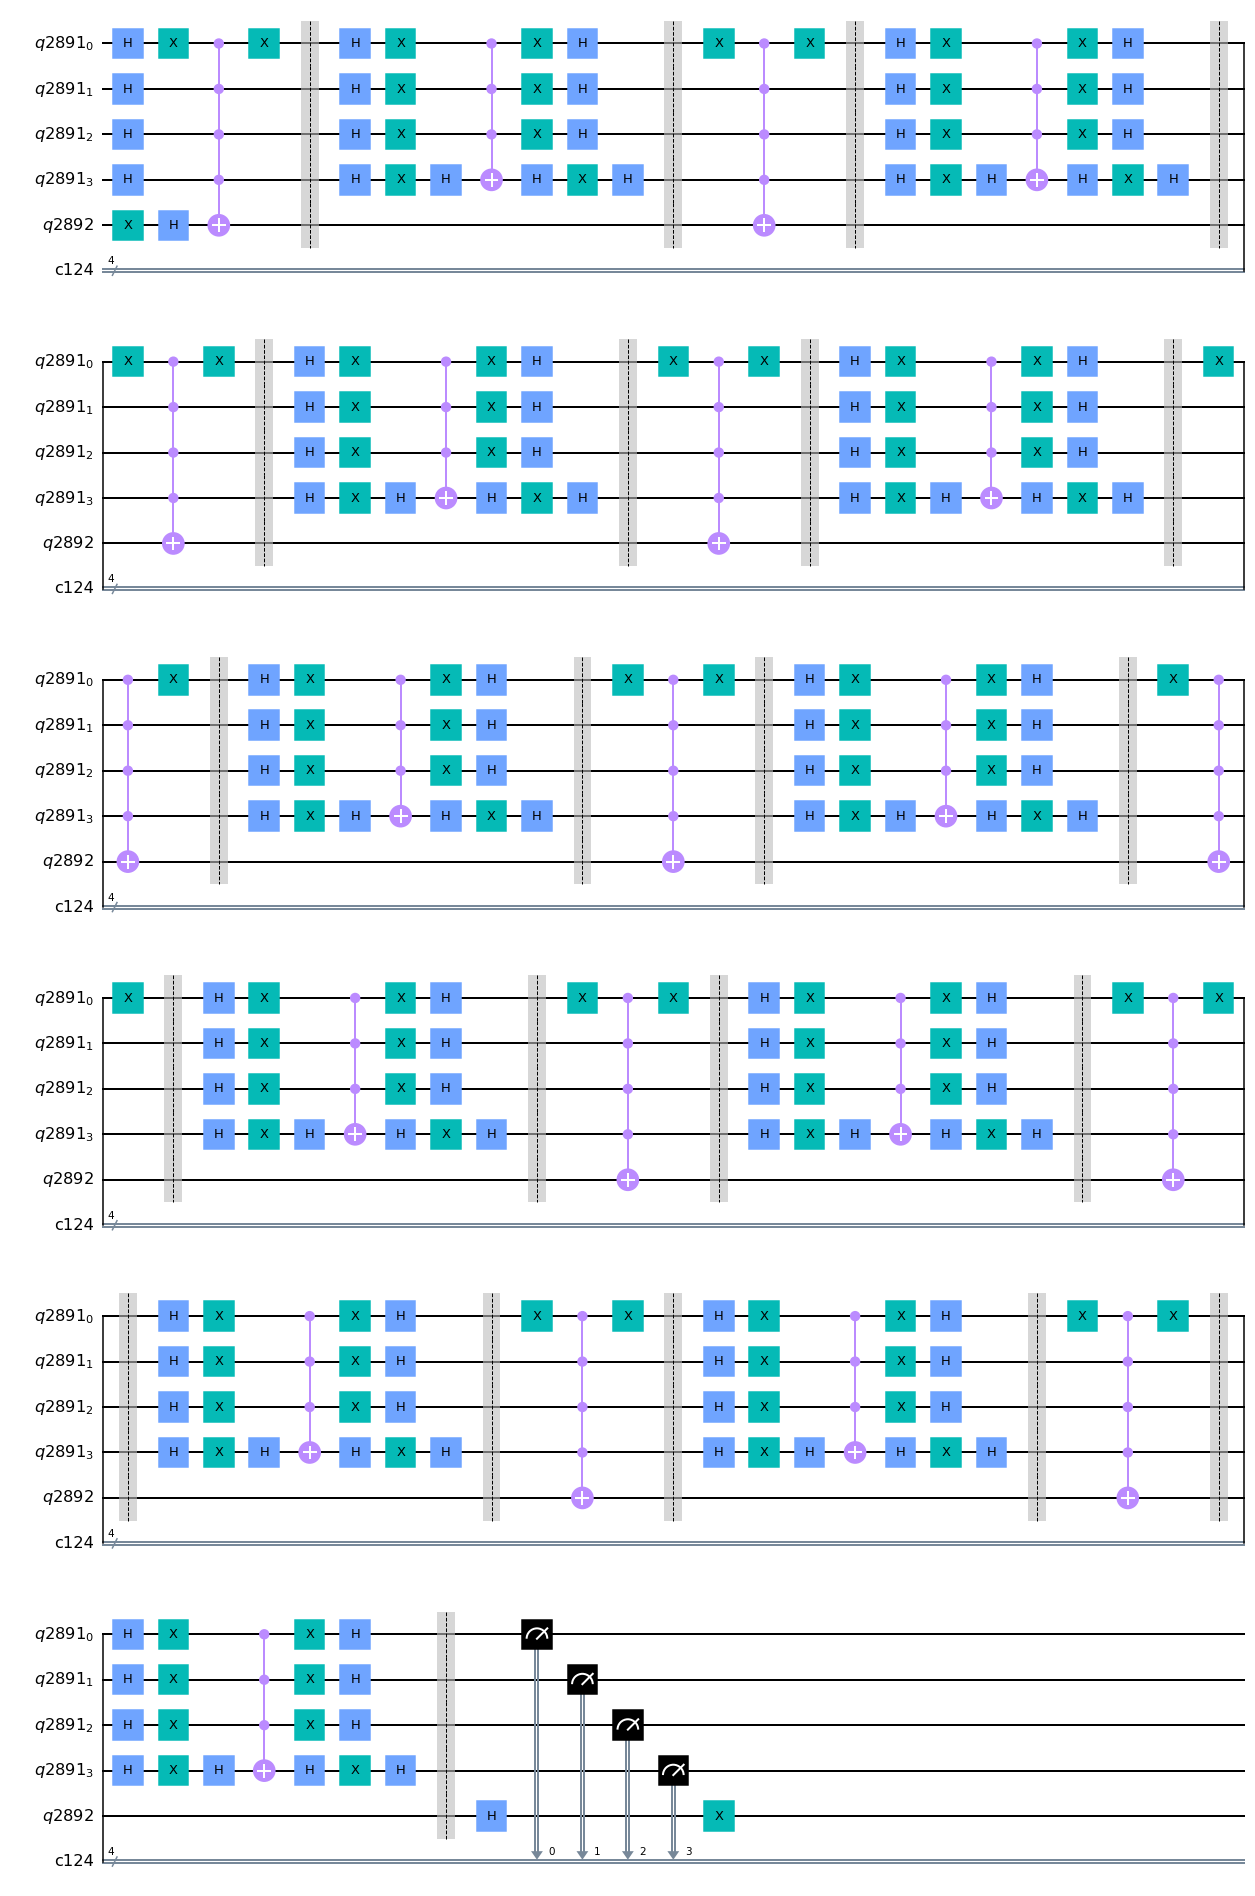

In [62]:
qc.draw(output="mpl")

Text(0, 0.5, 'Вероятность правильного ответа')

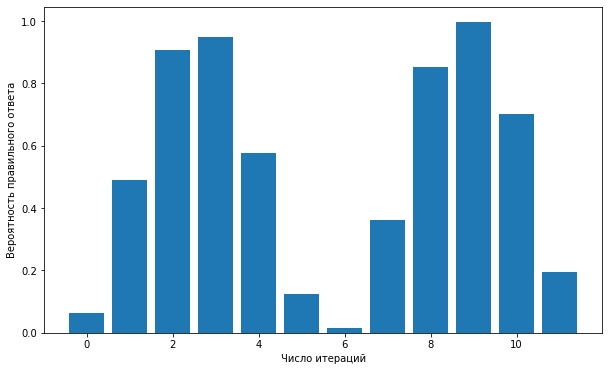

In [64]:
iteration = [i for i in range(iter_num)]
plt.figure(figsize=(10, 6))
plt.bar(iteration, prob_of_ans)
plt.xlabel('Число итераций')
plt.ylabel('Вероятность правильного ответа')